In [1]:
import pandas as pd
import pylab as pl
import datetime as dt
import itertools
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Filtered for November 2016 to current and QUEENS on the NYC open data site:
# https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95
# File is included to make it reproducible
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', parse_dates=['DATE'])

df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2015-11-01,9:48,QUEENS,11358.0,40.753987,-73.807685,"(40.7539871, -73.8076851)",46 AVENUE,159 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3327044,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,2015-11-01,9:30,QUEENS,11433.0,40.694764,-73.795505,"(40.6947643, -73.7955048)",108 AVENUE,157 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3326955,SPORT UTILITY / STATION WAGON,BUS,NaN,NaN,NaN
2,2015-11-01,9:18,QUEENS,11413.0,40.675885,-73.755762,"(40.675885, -73.7557617)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,NaN,...,Unspecified,NaN,NaN,NaN,3327080,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
3,2015-11-01,8:55,QUEENS,11411.0,40.698094,-73.730486,"(40.6980943, -73.7304863)",115 AVENUE,228 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3327594,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
4,2015-11-01,8:40,QUEENS,11101.0,40.742488,-73.956670,"(40.742488, -73.9566697)",51 AVENUE,5 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3328385,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN


In [3]:
# Create column for month
df['month'] = df['DATE'].dt.month
# Create column for year
df['year'] = df['DATE'].dt.year

# choose only 2016
df_16 = df[df['year'] == 2016]

# alcohol involvment
df_alc = df_16[df_16['CONTRIBUTING FACTOR VEHICLE 1'] == 'Alcohol Involvement']
df_alc.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,month,year
7167,2016-01-01,19:30,QUEENS,11419.0,40.694052,-73.828009,"(40.6940516, -73.8280091)",ATLANTIC AVENUE,LEFFERTS BOULEVARD,NaN,...,NaN,NaN,3363885,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,1,2016
7207,2016-01-01,11:10,QUEENS,11370.0,40.763053,-73.886730,"(40.7630535, -73.8867296)",82 STREET,25 AVENUE,NaN,...,NaN,NaN,3363995,UNKNOWN,NaN,NaN,NaN,NaN,1,2016
7214,2016-01-01,4:00,QUEENS,11101.0,40.735553,-73.934779,"(40.7355527, -73.9347786)",BRADLEY AVENUE,GREENPOINT AVENUE,NaN,...,NaN,NaN,3363933,SPORT UTILITY / STATION WAGON,TAXI,NaN,NaN,NaN,1,2016
7222,2016-01-01,2:15,QUEENS,11361.0,40.768095,-73.763258,"(40.7680947, -73.7632576)",221 STREET,38 AVENUE,NaN,...,NaN,NaN,3363581,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,1,2016
7223,2016-01-01,23:25,QUEENS,11412.0,40.708809,-73.758718,"(40.7088094, -73.7587178)",200 STREET,104 AVENUE,NaN,...,Unspecified,NaN,3363898,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,1,2016


In [4]:
# groupby month all
df_plot = df_16.groupby(['month']).agg(['count'])
df_plot

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,year
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
month,,,,,,,,,,,,,,,,,,,,,
1,3853,3853,3853,3852,3851,3851,3851,3762,3762,87,...,251,53,14,3853,3852,3441,257,52,15,3853
2,3049,3049,3049,3049,3049,3049,3049,2962,2962,85,...,180,46,9,3049,3049,2704,182,46,9,3049
3,3710,3710,3710,3706,3585,3585,3585,3628,3628,2158,...,228,52,15,3710,3688,3196,217,47,15,3710
4,3585,3585,3585,3580,3394,3394,3394,3532,3532,3408,...,237,53,11,3585,3562,2988,235,54,12,3585
5,3751,3751,3751,3748,3559,3559,3559,3693,3693,3578,...,266,54,17,3751,3727,3214,253,52,15,3751
6,3400,3400,3400,3399,3302,3302,3302,3357,3357,3305,...,231,62,11,3400,3374,2908,223,61,10,3400
7,3515,3515,3515,3514,3002,3002,3002,3330,3330,3139,...,244,51,5,3515,3490,3059,230,51,5,3515
8,3367,3367,3367,3365,162,162,162,2145,2145,1220,...,262,55,15,3367,3353,2931,249,52,15,3367


In [5]:
# groupby month alc
df_plot_alc = df_alc.groupby(['month']).agg(['count'])
alc_nested = [df_plot_alc['UNIQUE KEY'][0:5].values, [0], df_plot_alc['UNIQUE KEY'][5:].values]
alc_flat = list(itertools.chain(*alc_nested))


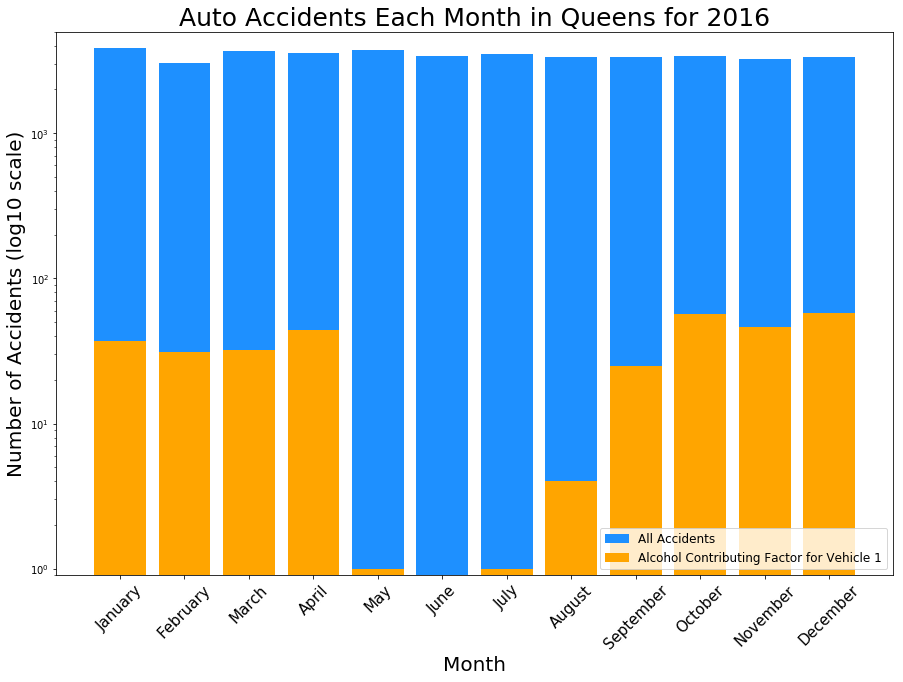

In [6]:
pl.figure(figsize=[15,10])
pl.bar(range(12), df_plot['UNIQUE KEY']['count'][:], label = 'All Accidents', color='dodgerblue')
pl.bar(range(12), alc_flat, label = 'Alcohol Contributing Factor for Vehicle 1', color='orange')
pl.xticks(range(12), ('January',
'February',
'March',
'April',
'May',
'June',
'July',
'August',
'September',
'October',
'November',
'December'), fontsize=15, rotation=45)
pl.title('Auto Accidents Each Month in Queens for 2016', fontsize=25)
pl.ylabel('Number of Accidents (log10 scale)', fontsize=20)
pl.xlabel('Month', fontsize=20)
pl.ylim(0.9, 5000)
pl.yscale('log')
pl.legend(loc='lower right', fontsize =12)